In [232]:
import os
import numpy as np
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, TimeDistributed, Flatten, Bidirectional, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [233]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [234]:
angry_path = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/Anger')
calm_path = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/Calm')
neutral_path = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/Neutral')
happy_path = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/Happy')
sad_path = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/Sad')

# Define the number of MFCCs (Mel Frequency Cepstral Coefficients) to extract from each audio file
num_mfcc = 40

# Define a fixed length for each feature matrix
max_len = 500

# Define a function to extract the MFCCs from an audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=44100)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)
    return mfccs

# Load the data into memory
X = []
y = []
for path, emotion in [(angry_path, 0), (calm_path, 1), (neutral_path, 2), (happy_path, 3), (sad_path, 4)]:
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        mfccs = extract_features(file_path)
        if len(mfccs.T) <= max_len:
            pad_width = max_len - len(mfccs.T)
            mfccs = np.pad(mfccs.T, pad_width=((0, pad_width), (0, 0)), mode='constant')
            X.append(mfccs)
            y.append(emotion)

X = np.array(X)
y = np.array(y)


In [235]:
X.shape

(4753, 500, 40)

In [236]:
y.shape

(4753,)

In [237]:
# Convert the target labels to one-hot encoded vectors
y = to_categorical(y)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to fit the RNN input shape
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [209]:
# Convert the target labels to one-hot encoded vectors
y = to_categorical(y)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)



In [238]:
X_train.shape

(3802, 500, 40, 1, 1)

In [239]:
# Define the model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(max_len, num_mfcc, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(TimeDistributed(Flatten()))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))

model.add(Bidirectional(LSTM(units=128)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

2024-09-11 21:57:38.711934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-11 21:57:38.713029: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-11 21:57:38.714161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [27]:
# Define the model architecture
model = Sequential()

model.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(max_len, num_mfcc, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(TimeDistributed(Flatten()))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))

model.add(Bidirectional(LSTM(units=128)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

2024-09-08 19:15:17.503067: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-08 19:15:17.504439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-08 19:15:17.505338: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 500, 40, 32)       320       
                                                                 
 batch_normalization (BatchN  (None, 500, 40, 32)      128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 250, 20, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 20, 64)       18496     
                                                                 
 batch_normalization_1 (Batc  (None, 250, 20, 64)      256       
 hNormalization)                                                 
                                                        

In [9]:
model = Sequential()

# First Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=128, return_sequences=True, input_shape=(max_len, num_mfcc))))
model.add(BatchNormalization())  # Add batch normalization
model.add(Dropout(0.3))  # Add dropout to prevent overfitting

# Second Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=32, return_sequences=False)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dense layer for classification
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

# Output layer (for 5-class classification)
model.add(Dense(5, activation='softmax'))

2024-09-07 21:30:54.636382: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1022 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1a:00.0, compute capability: 8.6
2024-09-07 21:30:54.637024: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22196 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:68:00.0, compute capability: 8.6


In [240]:
# Compile the model
lstmmodel = model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a callback for TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=10, verbose=1, mode='auto',
                               baseline=None, restore_best_weights=True)

In [241]:
# Train the model
history = lstmmodel.fit(
    X_train_1, y_train_1,
    validation_data=(X_test_1, y_test_1),
    epochs=2, 
    batch_size=16,
    callbacks=[early_stopping, tensorboard_callback]
  )

#Save the model
lstmmodel.save('my_model.h5')

#Evaluate the model on test data
test_loss_1, test_acc_1 = lstmmodel.evaluate(X_test_1, y_test_1)

print('Test accuracy:', test_acc_1)

Epoch 1/2


2024-09-11 21:57:52.045717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-11 21:57:52.047396: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-11 21:57:52.048648: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

233/238 [============================>.] - ETA: 0s - loss: 1.5853 - accuracy: 0.4740

2024-09-11 21:57:59.502663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-11 21:57:59.504403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-11 21:57:59.505652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

238/238 [==============================] - 8s 13ms/step - loss: 1.5780 - accuracy: 0.4774 - val_loss: 1.3125 - val_accuracy: 0.5363
Epoch 2/2
30/30 [==============================] - 0s 5ms/step - loss: 0.8477 - accuracy: 0.7056
Test accuracy: 0.7055730819702148


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
import seaborn as sns

# Predict the classes for the test set
y_pred_1 = lstmmodel.predict(X_test_1)
y_pred_classes_1 = np.argmax(y_pred_1, axis=1)  # Convert predictions to class labels
y_true_1 = np.argmax(y_test_1, axis=1)  # Convert one-hot true labels to class labels

# Generate confusion matrix
cm = confusion_matrix(y_true_1, y_pred_classes_1)

# Plot confusion matrix using seaborn or matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Alternative using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')
plt.show()


In [198]:


for i in range(0, len(y_pred_classes)):
    if y_pred_classes[i] != y_test_classes[i]:
        print("Not match")
    else:
        print("matched")

print("ASDAS")

NameError: name 'audio_correct' is not defined

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM

tf.keras.backend.clear_session()
#from sklearn.metrics import plot_confusion_matrix
from sklearn import datasets, tree, linear_model, svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import GRU


In [214]:

path_csv = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/emotions.csv')


for dirname, _, filenames in os.walk(path_csv):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Reading dataset
EEGData = pd.read_csv(path_csv)


#Seprarting Positive,Neagtive and Neutral dataframes for plortting
pos = EEGData.loc[EEGData["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = EEGData.loc[EEGData["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = EEGData.loc[EEGData["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

def Transform_data(EEGData):
    #Encoding Lables into numbers
    encoding_data = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
    data_encoded = EEGData.replace(encoding_data)
    #getting brain signals into x variable
    x=data_encoded.drop(["label"]  ,axis=1)
    #getting labels into y variable
    y = data_encoded.loc[:,'label'].values
    scaler = StandardScaler()
    #scaling Brain Signals
    scaler.fit(x)
    X = scaler.transform(x)
    #One hot encoding Labels
    Y = to_categorical(y)
    return X,Y



#Calling above function and splitting dataset into train and test
X,Y = Transform_data(EEGData)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X, Y, test_size = 0.2, random_state = 4)



# Reshape the data to fit the RNN input shape
x_train_2 = np.expand_dims(x_train_2, axis=-1)
x_test_2 = np.expand_dims(x_test_2, axis=-1)

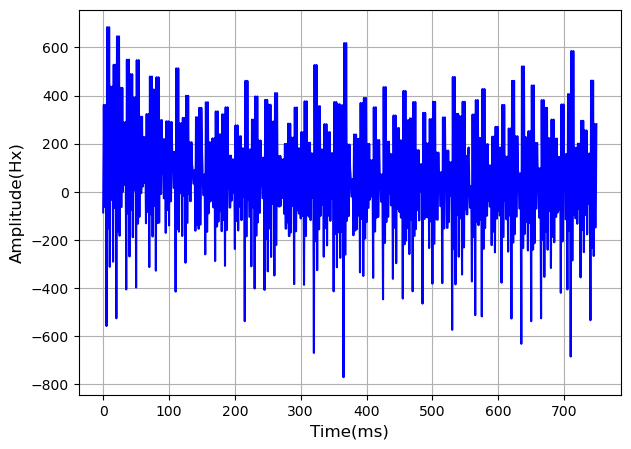

In [215]:
#Plotting Positive DataFrame with different line style and markers
plt.figure(figsize=(7, 5))
plt.plot(range(len(sample_pos)), sample_pos, linestyle='-', color='blue', markerfacecolor='red', markeredgewidth=2)
# plt.title("Graph of Positive Columns", fontsize=18)
plt.xlabel('Time(ms)', fontsize=12)
plt.ylabel('Amplitude(Hx)', fontsize=12)
plt.grid(True)
plt.savefig('sample_pos.png')  # Save the plot
plt.show()

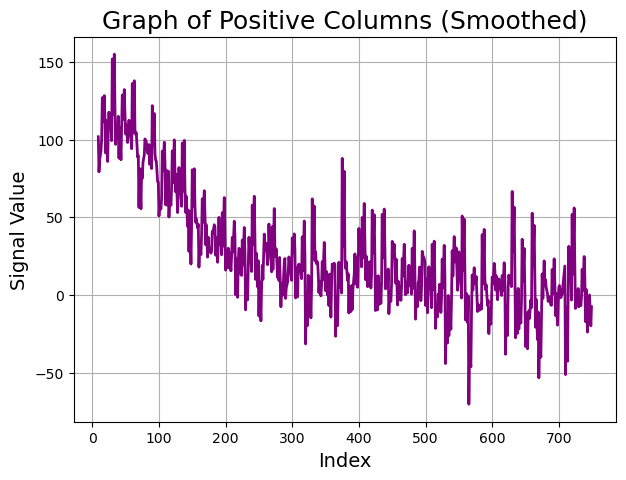

In [216]:
import pandas as pd

# Smoothing the signal using a rolling average (window size of 10)
smoothed_pos = pd.Series(sample_pos).rolling(window=10).mean()

plt.figure(figsize=(7, 5))
plt.plot(range(len(sample_pos)), smoothed_pos, color='purple', linewidth=2)
plt.title("Graph of Positive Columns (Smoothed)", fontsize=18)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Signal Value', fontsize=14)
plt.grid(True)
plt.show()


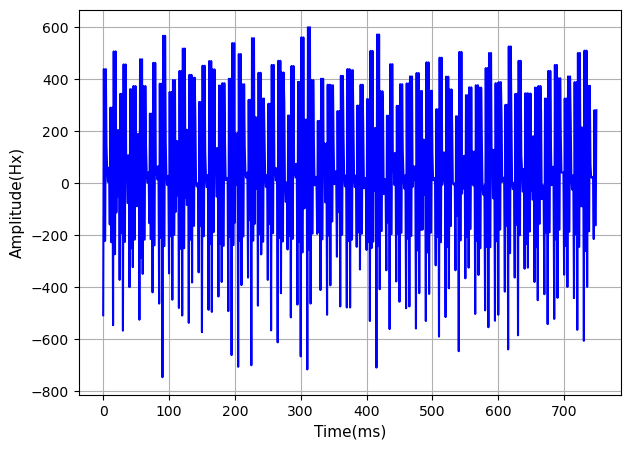

In [217]:

#Plotting Positive DataFrame with different line style and markers
plt.figure(figsize=(7, 5))
plt.plot(range(len(sample_neg)), sample_neg, linestyle='-', color='blue', markerfacecolor='red', markeredgewidth=2)
# plt.title("Graph of Positive Columns", fontsize=18)
plt.xlabel('Time(ms)', fontsize=11)
plt.ylabel('Amplitude(Hx)', fontsize=11)
plt.grid(True)
plt.savefig('sample_neg.png')  # Save the plot
plt.show()

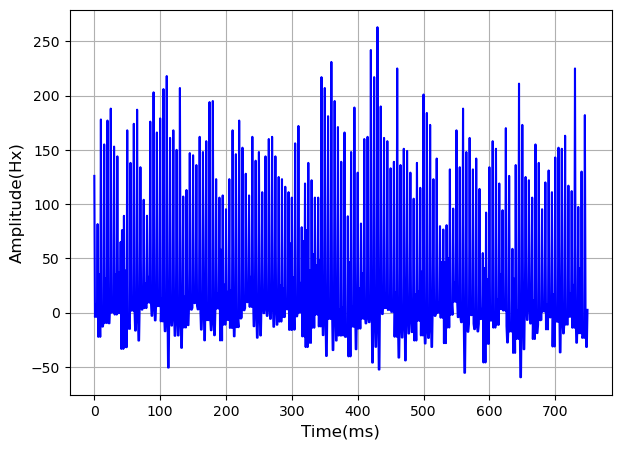

In [218]:

#Plotting Positive DataFrame with different line style and markers
plt.figure(figsize=(7, 5))
plt.plot(range(len(sample_neu)), sample_neu, linestyle='-', color='blue', markerfacecolor='red', markeredgewidth=2)
# plt.title("Graph of Positive Columns", fontsize=18)
plt.xlabel('Time(ms)', fontsize=12)
plt.ylabel('Amplitude(Hx)', fontsize=12)
plt.grid(True)
plt.savefig('sample_neu.png')  # Save the plot
plt.show()

In [219]:
X.shape

(2132, 2548)

In [220]:
Y.shape

(2132, 3)

In [221]:
x_train.shape

(1705, 2548, 1)

In [46]:
def create_model():
    #input layer of model for brain signals
    inputs = tf.keras.Input(shape=(x_train.shape[1],))
    #Hidden Layer for Brain signal using LSTM(GRU)
    expand_dims = tf.expand_dims(inputs, axis=2)

    gru = tf.keras.layers.GRU(64, return_sequences=True)(expand_dims)
    #Flatten Gru layer into vector form (one Dimensional array)
    gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
    #Flatten Gru layer into vector form (one Dimensional array)
    gru = tf.keras.layers.GRU(64, return_sequences=True)(expand_dims)
    #Flatten Gru layer into vector form (one Dimensional array)
    flatten = tf.keras.layers.Flatten()(gru)
    #output latyer of Model
    outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)


    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model

2024-09-08 20:20:49.817293: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-08 20:20:49.818571: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-08 20:20:49.819443: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims_1 (TFOpLambd  (None, 2548, 1)          0         
 a)                                                              
                                                                 
 gru_5 (GRU)                 (None, 2548, 64)          12864     
                                                                 
 flatten_1 (Flatten)         (None, 163072)            0         
                                                                 
 dense_1 (Dense)             (None, 3)                 489219    
                                                                 
Total params: 502,083
Trainable params: 502,083
Non-trainable params: 0
_____________________________________________________

2024-09-08 20:20:50.111078: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-08 20:20:50.112352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-08 20:20:50.113200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [222]:
def create_improved_model():
    # Input layer of model for brain signals
    inputs = tf.keras.Input(shape=(x_train_2.shape[1],))
    
    # Expand dimensions to make the input compatible with GRU
    expand_dims = tf.expand_dims(inputs, axis=2)
    
    # Add Bidirectional GRU layers
    gru = Bidirectional(GRU(64, return_sequences=True))(expand_dims)
    gru = BatchNormalization()(gru)
    gru = Dropout(0.3)(gru)  # Dropout for regularization
    
    gru = Bidirectional(GRU(128, return_sequences=True))(gru)
    gru = BatchNormalization()(gru)
    gru = Dropout(0.3)(gru)
    
    gru = Bidirectional(GRU(64, return_sequences=False))(gru)
    gru = BatchNormalization()(gru)
    gru = Dropout(0.3)(gru)
    
    # Flatten the GRU output
    flatten = Flatten()(gru)
    
    # Fully connected layer with ReLU activation
    dense = Dense(128, activation='relu')(flatten)
    dense = Dropout(0.3)(dense)  # Dropout for regularization
    
    # Output layer (3 classes: Neutral, Positive, Negative) with softmax activation
    outputs = Dense(3, activation='softmax')(dense)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model

In [223]:
# Define a callback for TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs_2')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=10, verbose=1, mode='auto',
                               baseline=None, restore_best_weights=True)

#cretaing model
grumodel = create_improved_model()
#Compiling model
grumodel.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

2024-09-11 21:52:05.590089: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-11 21:52:05.591499: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-11 21:52:05.592413: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 2548, 1)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 2548, 128)        25728     
 nal)                                                            
                                                                 
 batch_normalization_5 (Batc  (None, 2548, 128)        512       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 2548, 128)         0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 2548, 256)        198144

2024-09-11 21:52:06.184544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-11 21:52:06.185919: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-11 21:52:06.186786: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [224]:
# Train the model
history = grumodel.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=2, 
    batch_size=16,
    callbacks=[early_stopping, tensorboard_callback]
  )

#Save the model
grumodel.save('my_model_gru.h5')

#Evaluate the model on test data
test_loss, test_acc = grumodel.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

ValueError: Data cardinality is ambiguous:
  x sizes: 1705
  y sizes: 3802
Make sure all arrays contain the same number of samples.

In [225]:
#Loss and Accuracy of model on Testiong Dataset
print(f"Loss on testing: {loss*100}",f"\nAccuracy on Training: {acc*100}")

Loss on testing: 12.704187631607056 
Accuracy on Training: 97.89227247238159


In [226]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
import seaborn as sns

# Predict the classes for the test set
y_pred = grumodel.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix using seaborn or matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Alternative using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')
plt.show()

2024-09-11 21:52:29.493503: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-11 21:52:29.495253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-11 21:52:29.496642: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

14/14 [==============================] - 3s 140ms/step


ValueError: Found input variables with inconsistent numbers of samples: [951, 427]

In [ ]:


print("pred class -> ", y_pred_classes)

print("test class -> ", y_true)

print("Unique predicted classes:", np.unique(y_pred_classes))

# Check the unique predicted classes
print("Unique test classes:", np.unique(y_true))

# Adjust the target names if necessary, based on the unique classes present in the predictions
target_names = ['NEUTRAL', 'POSITIVE', 'NEGATIVE']  # Modify this list based on actual predictions


In [193]:
from tensorflow.keras.layers import Concatenate, Dense, Input
from tensorflow.keras.models import Model

def rename_layers(model, prefix):
    for layer in model.layers:
        layer._name = prefix + "_" + layer.name
    return model

# Load or define your models
speech_model = lstmmodel  # Speech model
eeg_model = grumodel      # EEG model

# Rename the layers to ensure unique names
speech_model = rename_layers(speech_model, "speech")
eeg_model = rename_layers(eeg_model, "eeg")

# Combine the models as before
speech_output = speech_model.output
eeg_output = eeg_model.output

combined = Concatenate()([speech_output, eeg_output])

# Add a final output layer
final_output = Dense(5, activation='softmax')(combined)

# Define the multimodal model
multimodal_model = Model(inputs=[speech_model.input, eeg_model.input], outputs=final_output)

# Compile the model
multimodal_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
print(multimodal_model.summary())


# Train the multimodal model
history = multimodal_model.fit(
    [X_train, x_train],  # Inputs: Speech and EEG data
    y_train,             # Common labels for both modalities
    validation_data=([X_test, x_test], y_test),
    epochs=2,
    batch_size=16,
    callbacks=[early_stopping, tensorboard_callback]
)

# Save the multimodal model
multimodal_model.save('multimodal_model.h5')

# Evaluate the multimodal model on test data
test_loss, test_acc = multimodal_model.evaluate([X_test, x_test], y_test)
print('Multimodal test accuracy:', test_acc)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv2d_input (InputLayer)      [(None, 500, 40, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 speech_conv2d (Conv2D)         (None, 500, 40, 32)  320         ['conv2d_input[0][0]']           
                                                                                                  
 speech_batch_normalization (Ba  (None, 500, 40, 32)  128        ['speech_conv2d[0][0]']          
 tchNormalization)                                                                                
                                                                                            

ValueError: Data cardinality is ambiguous:
  x sizes: 3802, 1705
  y sizes: 1705
Make sure all arrays contain the same number of samples.

In [97]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, TimeDistributed, Flatten, Dense, Bidirectional, LSTM, GRU, Input, Concatenate
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.optimizers import Adam

# Paths to the datasets
angry_path = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/Anger')
calm_path = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/Calm')
neutral_path = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/Neutral')
happy_path = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/Happy')
sad_path = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/Sad')

# Define the number of MFCCs (Mel Frequency Cepstral Coefficients) to extract from each audio file
num_mfcc = 40
max_len = 500

# Define a function to extract the MFCCs from an audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=44100)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)
    return mfccs

# Load the speech data
X = []
y = []
for path, emotion in [(angry_path, 0), (calm_path, 1), (neutral_path, 2), (happy_path, 3), (sad_path, 4)]:
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        mfccs = extract_features(file_path)
        if len(mfccs.T) <= max_len:
            pad_width = max_len - len(mfccs.T)
            mfccs = np.pad(mfccs.T, pad_width=((0, pad_width), (0, 0)), mode='constant')
            X.append(mfccs)
            y.append(emotion)

X = np.array(X)
y = np.array(y)

# Convert the target labels to one-hot encoded vectors
y = to_categorical(y)

# Load EEG data
path_csv = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/emotions.csv')
EEGData = pd.read_csv(path_csv)

def Transform_data(EEGData):
    # Encoding labels into numbers
    encoding_data = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
    data_encoded = EEGData.replace(encoding_data)
    x = data_encoded.drop(["label"], axis=1)
    y = data_encoded.loc[:, 'label'].values
    scaler = StandardScaler()
    scaler.fit(x)
    X = scaler.transform(x)
    Y = to_categorical(y)
    return X, Y

# Split the EEG data into training and testing sets
X_eeg, Y_eeg = Transform_data(EEGData)
x_train_eeg, x_test_eeg, y_train_eeg, y_test_eeg = train_test_split(X_eeg, Y_eeg, test_size=0.2, random_state=4)

# Trim the larger dataset to match the smaller dataset
min_samples = min(X.shape[0], x_train_eeg.shape[0])

# Trim both datasets
X_trimmed = X[:min_samples]
x_train_trimmed = x_train_eeg[:min_samples]
y_train_trimmed = y[:min_samples]  # Assuming the speech data labels
y_train_eeg_trimmed = y_train_eeg[:min_samples]  # EEG labels, trim accordingly

# Reshape the speech data
X_trimmed = np.expand_dims(X_trimmed, axis=-1)



In [98]:
print("Speech data shape:", X_trimmed.shape)
print("EEG data shape:", x_train_trimmed.shape)
print("Labels shape:", y_train_trimmed.shape)
print("Labels shape:", y_train_eeg_trimmed.shape)


Speech data shape: (1705, 500, 40, 1)
EEG data shape: (1705, 2548)
Labels shape: (1705, 5)
Labels shape: (1705, 3)


In [99]:

# Define the speech model
def create_speech_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(max_len, num_mfcc, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(TimeDistributed(Flatten()))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Bidirectional(LSTM(units=128)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))  # 5 classes for speech
    return model

# Define the EEG model
def create_eeg_model():
    inputs = Input(shape=(x_train_eeg.shape[1],))
    expand_dims = tf.expand_dims(inputs, axis=2)
    gru = Bidirectional(GRU(64, return_sequences=True))(expand_dims)
    gru = BatchNormalization()(gru)
    gru = Dropout(0.3)(gru)
    gru = Bidirectional(GRU(128, return_sequences=True))(gru)
    gru = BatchNormalization()(gru)
    gru = Dropout(0.3)(gru)
    gru = Bidirectional(GRU(64, return_sequences=False))(gru)
    gru = BatchNormalization()(gru)
    gru = Dropout(0.3)(gru)
    flatten = Flatten()(gru)
    dense = Dense(128, activation='relu')(flatten)
    dense = Dropout(0.3)(dense)
    outputs = Dense(3, activation='softmax')(dense)  # 3 classes for EEG
    model = Model(inputs=inputs, outputs=outputs)
    return model




In [100]:

# Create both models
speech_model = create_speech_model()
eeg_model = create_eeg_model()

# Compile both models
speech_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
eeg_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train both models independently
speech_model.fit(X_trimmed, y_train_trimmed, validation_split=0.2, epochs=2, batch_size=16)
eeg_model.fit(x_train_trimmed, y_train_eeg_trimmed, validation_split=0.2, epochs=2, batch_size=16)


2024-09-10 21:02:55.890546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-10 21:02:55.891903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-10 21:02:55.892785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/2


2024-09-10 21:02:57.295929: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-10 21:02:57.297727: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-10 21:02:57.299098: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

86/86 [==============================] - ETA: 0s - loss: 2.4840 - accuracy: 0.2016

2024-09-10 21:03:02.836877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-10 21:03:02.838442: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-10 21:03:02.839694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

86/86 [==============================] - 6s 22ms/step - loss: 2.4840 - accuracy: 0.2016 - val_loss: 1.7110 - val_accuracy: 0.4721
Epoch 2/2
86/86 [==============================] - 1s 11ms/step - loss: 2.2057 - accuracy: 0.2419 - val_loss: 1.4324 - val_accuracy: 0.5425
Epoch 1/2


2024-09-10 21:03:04.608560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-10 21:03:04.610268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-10 21:03:04.614189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

86/86 [==============================] - ETA: 0s - loss: 0.9184 - accuracy: 0.6173

2024-09-10 21:03:37.908574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-10 21:03:37.910340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-10 21:03:37.911597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

86/86 [==============================] - 38s 344ms/step - loss: 0.9184 - accuracy: 0.6173 - val_loss: 1.0211 - val_accuracy: 0.5718
Epoch 2/2
86/86 [==============================] - 28s 329ms/step - loss: 0.6473 - accuracy: 0.7346 - val_loss: 0.9252 - val_accuracy: 0.5249


In [101]:
# Combine the results from both models
speech_output = speech_model.output
eeg_output = eeg_model.output

# Concatenate the results
combined_output = Concatenate()([speech_output, eeg_output])

# Final classification layer
final_output = Dense(5, activation='softmax')(combined_output)

# Create the multimodal model
multimodal_model = Model(inputs=[speech_model.input, eeg_model.input], outputs=final_output)

# Compile the multimodal model
multimodal_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the multimodal model
multimodal_model.fit([X_trimmed, x_train_trimmed], y_train_trimmed, validation_split=0.2, epochs=2, batch_size=16)

# Evaluate the multimodal model
test_loss, test_acc = multimodal_model.evaluate([X_test, x_test_eeg], y_test_eeg)
print('Multimodal test accuracy:', test_acc)

Epoch 1/2


2024-09-10 21:04:10.520179: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-10 21:04:10.521793: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-10 21:04:10.523024: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

86/86 [==============================] - ETA: 0s - loss: 1.3046 - accuracy: 0.6122

2024-09-10 21:04:50.216764: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-10 21:04:50.218447: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-10 21:04:50.219679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

86/86 [==============================] - 45s 362ms/step - loss: 1.3046 - accuracy: 0.6122 - val_loss: 1.5114 - val_accuracy: 0.4780
Epoch 2/2
86/86 [==============================] - 29s 339ms/step - loss: 1.1936 - accuracy: 0.8380 - val_loss: 1.5064 - val_accuracy: 0.4780


ValueError: Data cardinality is ambiguous:
  x sizes: 951, 427
  y sizes: 427
Make sure all arrays contain the same number of samples.

In [104]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, Concatenate, Average
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

# Paths to the datasets
angry_path = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/Anger')
calm_path = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/Calm')
neutral_path = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/Neutral')
happy_path = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/Happy')
sad_path = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/Sad')

# Define the number of MFCCs (Mel Frequency Cepstral Coefficients) to extract from each audio file
num_mfcc = 40
max_len = 500

# Define a function to extract the MFCCs from an audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=44100)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)
    return mfccs

# Load the speech data
X = []
y = []
for path, emotion in [(angry_path, 0), (calm_path, 1), (neutral_path, 2), (happy_path, 3), (sad_path, 4)]:
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        mfccs = extract_features(file_path)
        if len(mfccs.T) <= max_len:
            pad_width = max_len - len(mfccs.T)
            mfccs = np.pad(mfccs.T, pad_width=((0, pad_width), (0, 0)), mode='constant')
            X.append(mfccs)
            y.append(emotion)

X = np.array(X)
y = np.array(y)

# Convert the target labels to one-hot encoded vectors
y = to_categorical(y)

# Load EEG data
path_csv = os.path.expanduser('~/Documents/notebook/MMNet/Dataset/emotions.csv')
EEGData = pd.read_csv(path_csv)

def Transform_data(EEGData):
    # Encoding labels into numbers
    encoding_data = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
    data_encoded = EEGData.replace(encoding_data)
    x = data_encoded.drop(["label"], axis=1)
    y = data_encoded.loc[:, 'label'].values
    scaler = StandardScaler()
    scaler.fit(x)
    X = scaler.transform(x)
    Y = to_categorical(y)
    return X, Y

# Split the EEG data into training and testing sets
X_eeg, Y_eeg = Transform_data(EEGData)
x_train_eeg, x_test_eeg, y_train_eeg, y_test_eeg = train_test_split(X_eeg, Y_eeg, test_size=0.2, random_state=4)

# Trim the larger dataset to match the smaller dataset
min_samples = min(X.shape[0], X_eeg.shape[0])

# Trim both datasets
X_trimmed = X[:min_samples]
x_train_trimmed = x_train_eeg[:min_samples]
y_train_trimmed = y[:min_samples]  # Assuming the speech data labels
y_train_eeg_trimmed = y_train_eeg[:min_samples]  # EEG labels, trim accordingly

# Reshape the speech data
X_trimmed = np.expand_dims(X_trimmed, axis=-1)

# Define the speech model
def create_speech_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(max_len, num_mfcc, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(TimeDistributed(Flatten()))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Bidirectional(LSTM(units=128)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))  # 5 classes for speech
    return model

# Define the EEG model
def create_eeg_model():
    inputs = Input(shape=(x_train_eeg.shape[1],))
    expand_dims = tf.expand_dims(inputs, axis=2)
    gru = Bidirectional(GRU(64, return_sequences=True))(expand_dims)
    gru = BatchNormalization()(gru)
    gru = Dropout(0.3)(gru)
    gru = Bidirectional(GRU(128, return_sequences=True))(gru)
    gru = BatchNormalization()(gru)
    gru = Dropout(0.3)(gru)
    gru = Bidirectional(GRU(64, return_sequences=False))(gru)
    gru = BatchNormalization()(gru)
    gru = Dropout(0.3)(gru)
    flatten = Flatten()(gru)
    dense = Dense(128, activation='relu')(flatten)
    dense = Dropout(0.3)(dense)
    outputs = Dense(5, activation='softmax')(dense)  # 3 classes for EEG
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create both models
speech_model = create_speech_model()
eeg_model = create_eeg_model()

# Compile both models
speech_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
eeg_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train both models independently
speech_model.fit(X_trimmed, y_train_trimmed, validation_split=0.2, epochs=2, batch_size=16)
eeg_model.fit(x_train_trimmed, y_train_eeg_trimmed, validation_split=0.2, epochs=2, batch_size=16)

# Combine the predictions using late fusion (average)
speech_output = speech_model.predict(X_trimmed)
eeg_output = eeg_model.predict(x_train_trimmed)

# Average the predictions
combined_output = (speech_output + eeg_output) / 2

# Evaluate the combined output on test data
speech_test_output = speech_model.predict(X_trimmed)
eeg_test_output = eeg_model.predict(x_test_eeg)

combined_test_output = (speech_test_output + eeg_test_output) / 2

# Calculate accuracy
from sklearn.metrics import accuracy_score
y_pred = np.argmax(combined_test_output, axis=1)
y_true = np.argmax(y_train_trimmed, axis=1)

accuracy = accuracy_score(y_true, y_pred)
print("Late Fusion Test Accuracy:", accuracy)


2024-09-10 21:32:20.841961: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-10 21:32:20.843325: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-10 21:32:20.844234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/2


2024-09-10 21:32:22.220351: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-10 21:32:22.222180: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-10 21:32:22.223427: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

105/107 [============================>.] - ETA: 0s - loss: 1.8103 - accuracy: 0.3994

2024-09-10 21:32:27.815958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-10 21:32:27.817650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-10 21:32:27.819844: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

107/107 [==============================] - 6s 18ms/step - loss: 1.8127 - accuracy: 0.4000 - val_loss: 2.4342 - val_accuracy: 0.0328
Epoch 2/2
107/107 [==============================] - 1s 11ms/step - loss: 0.9305 - accuracy: 0.7044 - val_loss: 3.6448 - val_accuracy: 0.0328
Epoch 1/2


2024-09-10 21:32:29.780288: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-10 21:32:29.781965: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-10 21:32:29.783201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

ValueError: in user code:

    File "/home/mahin/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/mahin/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mahin/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/mahin/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/mahin/anaconda3/lib/python3.11/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/home/mahin/anaconda3/lib/python3.11/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/mahin/anaconda3/lib/python3.11/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/mahin/anaconda3/lib/python3.11/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/mahin/anaconda3/lib/python3.11/site-packages/keras/losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/mahin/anaconda3/lib/python3.11/site-packages/keras/backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 3) and (None, 5) are incompatible


In [105]:
def emotion_classification_algorithm(Et, Se):
    """
    Implements Algorithm 1 for emotion classification based on general emotion type Et and specific emotion Se.
    :param Et: General Emotion Type (Positive, Negative, Neutral)
    :param Se: Specific Emotion (Happiness, Calmness, Sadness, Anger, Neutral)
    :return: Classified emotion or error message
    """
    if Et == "Positive":
        if Se == "Happiness":
            return "Happiness"
        elif Se == "Calmness":
            return "Calmness"
        else:
            return "Invalid for Positive emotion type"
    
    elif Et == "Negative":
        if Se == "Sadness":
            return "Sadness"
        elif Se == "Anger":
            return "Anger"
        else:
            return "Invalid for Negative emotion type"
    
    elif Et == "Neutral":
        if Se == "Neutral":
            return "Neutral"
        else:
            return "Invalid for Neutral emotion type"
    
    else:
        return "Invalid emotion type"


In [106]:
# Test on 100 or 200 test cases
n_test_cases = 200  # Use either 100 or 200 cases

# Assuming X_test_speech and X_test_eeg contain the test data
X_test_speech_trimmed = X_test[:n_test_cases]
X_test_eeg_trimmed = x_test_eeg[:n_test_cases]

# Get predictions from both models
speech_predictions = np.argmax(speech_model.predict(X_test_speech_trimmed), axis=1)
eeg_predictions = np.argmax(eeg_model.predict(X_test_eeg_trimmed), axis=1)

# Ground truth labels (assuming they are the same for both modalities)
y_test_trimmed = y_test[:n_test_cases]  # Ground truth for 100 or 200 test cases


2024-09-10 22:08:58.772255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-10 22:08:58.774008: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-10 22:08:58.775250: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/7 [===>..........................] - ETA: 3s

2024-09-10 22:08:58.973984: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-10 22:08:58.975689: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_1_grad/concat/split_1/split_dim' with dtype int32
	 [[{{node gradients/split_1_grad/concat/split_1/split_dim}}]]


7/7 [==============================] - 1s 12ms/step


2024-09-10 22:08:59.446549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-09-10 22:08:59.448306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-09-10 22:08:59.449559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

7/7 [==============================] - 2s 135ms/step


In [107]:
# Mappings for the general and specific emotion categories
general_emotion_mapping = {
    0: "Neutral",
    1: "Positive",
    2: "Negative"
}

specific_emotion_mapping = {
    0: "Happiness",  # Positive -> Happiness
    1: "Calmness",   # Positive -> Calmness
    2: "Sadness",    # Negative -> Sadness
    3: "Anger",      # Negative -> Anger
    4: "Neutral"     # Neutral -> Neutral
}


In [108]:
# Initialize counters
correct_classifications = 0
incorrect_classifications = 0

for i in range(n_test_cases):
    # Get predicted general emotion types and specific emotion from both models
    predicted_general_emotion = general_emotion_mapping[eeg_predictions[i]]
    predicted_specific_emotion = specific_emotion_mapping[speech_predictions[i]]
    
    # Classify the emotion using Algorithm 1
    classified_emotion = emotion_classification_algorithm(predicted_general_emotion, predicted_specific_emotion)
    
    # Check if the classification matches the ground truth
    ground_truth_general = general_emotion_mapping[np.argmax(y_test_trimmed[i])]
    ground_truth_specific = specific_emotion_mapping[np.argmax(y_test_trimmed[i])]
    
    if classified_emotion == ground_truth_specific:
        correct_classifications += 1
    else:
        incorrect_classifications += 1

# Calculate accuracy
accuracy = correct_classifications / n_test_cases * 100
print(f"Algorithm accuracy on {n_test_cases} test cases: {accuracy}%")


KeyError: 4